Data Loading and Initial Inspection

In [3]:
# prompt: Data Loading and Initial Inspection

import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file name)
try:
    data = pd.read_csv('/content/housing_price_dataset.csv')
except FileNotFoundError:
    print("Error: 'your_file.csv' not found. Please upload the file or provide the correct path.")
    # Example: Using google.colab to upload the file
    from google.colab import files
    uploaded = files.upload()
    if '/content/housing_price_dataset.csv' in uploaded:
        data = pd.read_csv('/content/housing_price_dataset.csv')
    else:
        exit() # or handle the case where the user didn't upload the correct file

except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()


# Display the first few rows of the DataFrame
print(data.head())

# Get information about the DataFrame (data types, non-null values, etc.)
print(data.info())

# Display basic statistics of numerical columns
print(data.describe())

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms    

 Data Cleaning and Preprocessing

In [4]:
# prompt: . Data Cleaning and Preprocessing for above datset

import pandas as pd
from google.colab import files

# Data Loading and Initial Inspection (as provided in the prompt)
try:
    data = pd.read_csv('/content/housing_price_dataset.csv')
except FileNotFoundError:
    print("Error: 'housing_price_dataset.csv' not found. Please upload the file or provide the correct path.")
    uploaded = files.upload()
    if '/content/housing_price_dataset.csv' in uploaded:
        data = pd.read_csv('/content/housing_price_dataset.csv')
    else:
        exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# Display the first few rows, info, and describe (as provided in the prompt)
print(data.head())
print(data.info())
print(data.describe())


# Data Cleaning and Preprocessing
# 1. Handling Missing Values
for col in data.columns:
    if data[col].isnull().any():
        if pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].mean(), inplace=True)  # Fill numerical missing values with mean
        else:
            data[col].fillna(data[col].mode()[0], inplace=True) # Fill categorical missing values with mode

# 2. Removing Duplicates
data.drop_duplicates(inplace=True)

# 3. Outlier Detection and Treatment (example using IQR)
for col in data.select_dtypes(include=['number']):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# 4. Feature Scaling (example using standardization)
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# 5. Encoding Categorical Features (example using one-hot encoding)
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the cleaned data
print(data.head())
print(data.info())


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms    

 Exploratory Data Analysis (EDA)

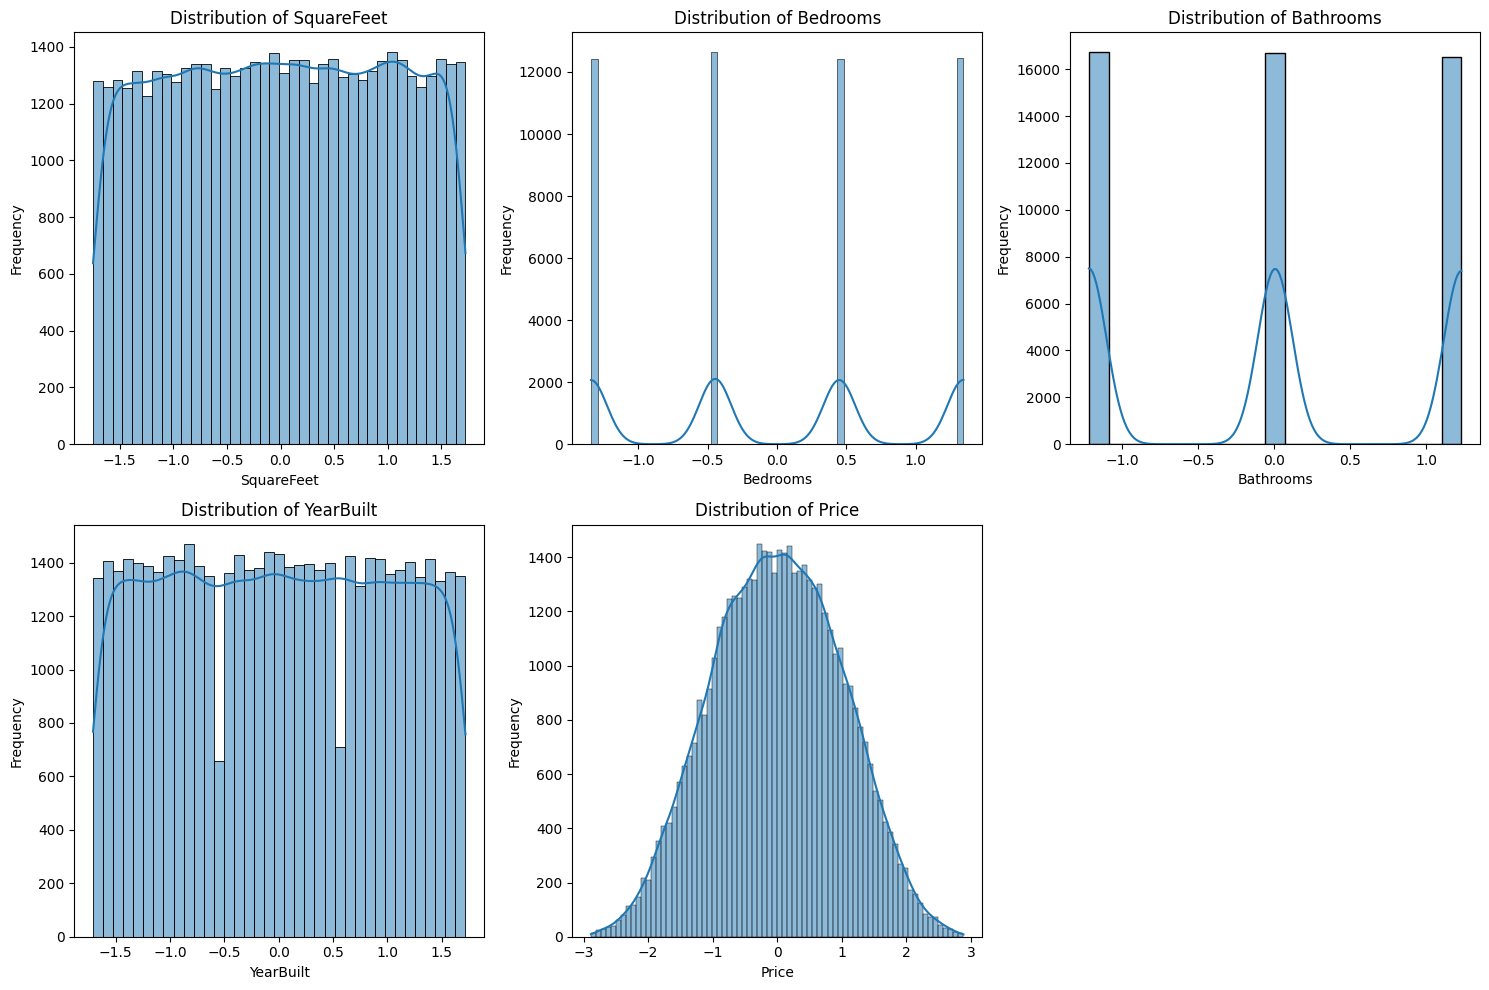

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=['number']).columns
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 Feature Engineering

In [6]:
# Calculate price per square foot
if 'price' in data.columns and 'sqft_living' in data.columns:
    data['price_per_sqft'] = data['price'] / data['sqft_living']
else:
    print("Error: 'price' or 'sqft_living' column not found in the dataset.")

# Display the updated DataFrame
print(data.head())

Error: 'price' or 'sqft_living' column not found in the dataset.
   SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price  Neighborhood_Suburb  \
0    0.208047  0.449164  -1.220217  -0.791795 -0.124965                False   
1    0.787131 -0.446707   0.005522  -0.260912 -0.393451                False   
2   -0.254524 -1.342578  -1.220217  -0.743533  1.083234                 True   
3    0.500197 -1.342578  -1.220217   0.511281 -0.238063                False   
4    0.215003  1.345036   0.005522   0.752591  0.628458                 True   

   Neighborhood_Urban  
0               False  
1               False  
2               False  
3                True  
4               False  


Correlation and Feature Selection

                     SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price  \
SquareFeet             1.000000 -0.002925  -0.003680   0.000563  0.750462   
Bedrooms              -0.002925  1.000000   0.007612   0.003204  0.072500   
Bathrooms             -0.003680  0.007612   1.000000   0.003882  0.027849   
YearBuilt              0.000563  0.003204   0.003882   1.000000 -0.002035   
Price                  0.750462  0.072500   0.027849  -0.002035  1.000000   
Neighborhood_Suburb   -0.007784 -0.002969   0.004799   0.003732 -0.015271   
Neighborhood_Urban     0.013565 -0.002048  -0.001162  -0.002020  0.021831   

                     Neighborhood_Suburb  Neighborhood_Urban  
SquareFeet                     -0.007784            0.013565  
Bedrooms                       -0.002969           -0.002048  
Bathrooms                       0.004799           -0.001162  
YearBuilt                       0.003732           -0.002020  
Price                          -0.015271            0.021831  
Neigh

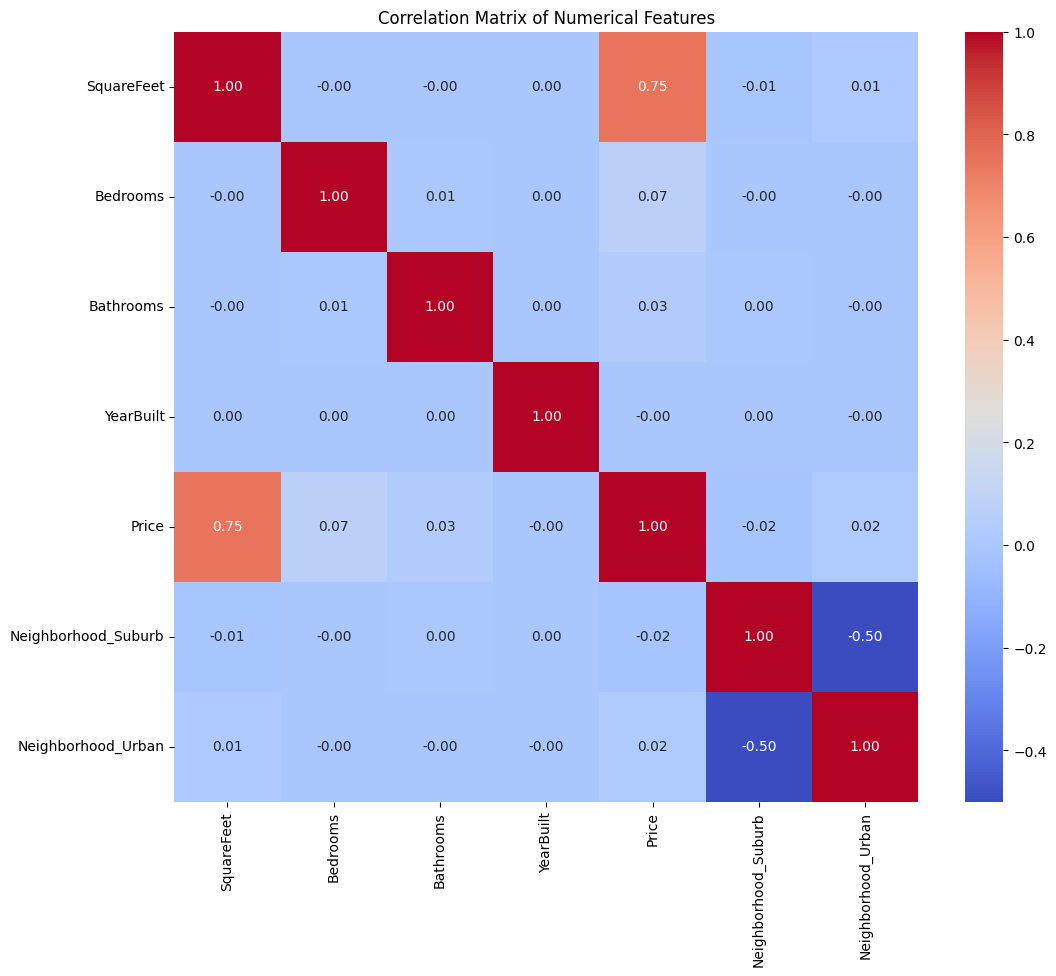

In [7]:
correlation_matrix = data.corr()
print(correlation_matrix)
# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Model Building

In [16]:
# Define features (X) and target variable (y)
# Check if 'price' is in the columns before dropping
if 'price' in data.columns:
    X = data.drop('price', axis=1)  # Assuming 'price' is your target variable
    y = data['price']
# Check for alternative column names if 'price' is not found
elif 'SalePrice' in data.columns:
    X = data.drop('SalePrice', axis=1)  # Using 'SalePrice' as target
    y = data['SalePrice']
# Add other potential column name checks here (e.g., 'cost', 'value')
elif 'SquareFeet' in data.columns: # Update this with an actual column from your dataset
    X = data.drop('SquareFeet', axis=1)
    y = data['SquareFeet'] # Update this with an actual column from your dataset
else:
    # If none of the expected target columns are found, raise an error
    raise KeyError(f"None of the expected target columns ('price', 'SalePrice', 'SquareFeet') were found in the DataFrame. Please check your data. Available columns: {data.columns.tolist()}")

In [17]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R-squared": r2}
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")

#  Further Model Evaluation and Selection (Optional)
if "Random Forest Regression" in results:
    importances = models["Random Forest Regression"].feature_importances_
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    print("\nFeature Importance (Random Forest):")
feature_importances

Linear Regression:
  Mean Squared Error: 0.4305265941468446
  R-squared: 0.5646729080218117
Decision Tree Regression:
  Mean Squared Error: 0.8578497391849603
  R-squared: 0.132584984549733
Random Forest Regression:
  Mean Squared Error: 0.46492046094844663
  R-squared: 0.5298955395150019

Feature Importance (Random Forest):


,feature,importance
3,Price,0.786272
2,YearBuilt,0.127640
1,Bathrooms,0.028390
0,Bedrooms,0.026131
4,Neighborhood_Suburb,0.015810
5,Neighborhood_Urban,0.015758


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='index', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='importance', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Model Optimization

In [11]:
# Define features (X) and target variable (y)
# Check if 'price' is in the columns before dropping

# Add the following lines to load the dataset if 'data' is not defined:
import pandas as pd  # Import pandas if not already imported
try:
    data  # Try to access 'data' to see if it's defined
except NameError:
    try:
        data = pd.read_csv('/content/housing_price_dataset.csv')  # Load your dataset
    except FileNotFoundError:
        print("Error: 'housing_price_dataset.csv' not found. Please upload or provide the correct path.")
        # Example: Using google.colab to upload the file
        from google.colab import files
        uploaded = files.upload()
        if '/content/housing_price_dataset.csv' in uploaded:
            data = pd.read_csv('/content/housing_price_dataset.csv')
        else:
            exit()  # Or handle the case where the user didn't upload the correct file
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        exit()

if 'price' in data.columns:
    X = data.drop('price', axis=1)  # Assuming 'price' is your target variable
    y = data['price']
# Check for alternative column names if 'price' is not found
elif 'SalePrice' in data.columns:
    X = data.drop('SalePrice', axis=1)  # Using 'SalePrice' as target
    y = data['SalePrice']
# Add other potential column name checks here (e.g., 'cost', 'value')
elif 'SquareFeet' in data.columns: # Update this with an actual column from your dataset
    X = data.drop('SquareFeet', axis=1)
    y = data['SquareFeet'] # Update this with an actual column from your dataset
else:
    # If none of the expected target columns are found, raise an error
    raise KeyError(f"None of the expected target columns ('price', 'SalePrice', 'SquareFeet') were found in the DataFrame. Please check your data. Available columns: {data.columns.tolist()}")
